In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv('Battery_RUL.csv')
df.drop(columns='Cycle_Index', inplace=True)

In [133]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [134]:
df

,F1,F2,F3,F4,F5,F6,F7,RUL
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [14]:
df.isnull().sum()

Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [15]:
new_col_labels = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']

df_column_dict = dict(zip(df.columns, new_col_labels))
df_column_dict

{'Discharge Time (s)': 'F1',
 'Decrement 3.6-3.4V (s)': 'F2',
 'Max. Voltage Dischar. (V)': 'F3',
 'Min. Voltage Charg. (V)': 'F4',
 'Time at 4.15V (s)': 'F5',
 'Time constant current (s)': 'F6',
 'Charging time (s)': 'F7'}

In [16]:
df.rename(mapper=df_column_dict, axis=1, inplace=True)

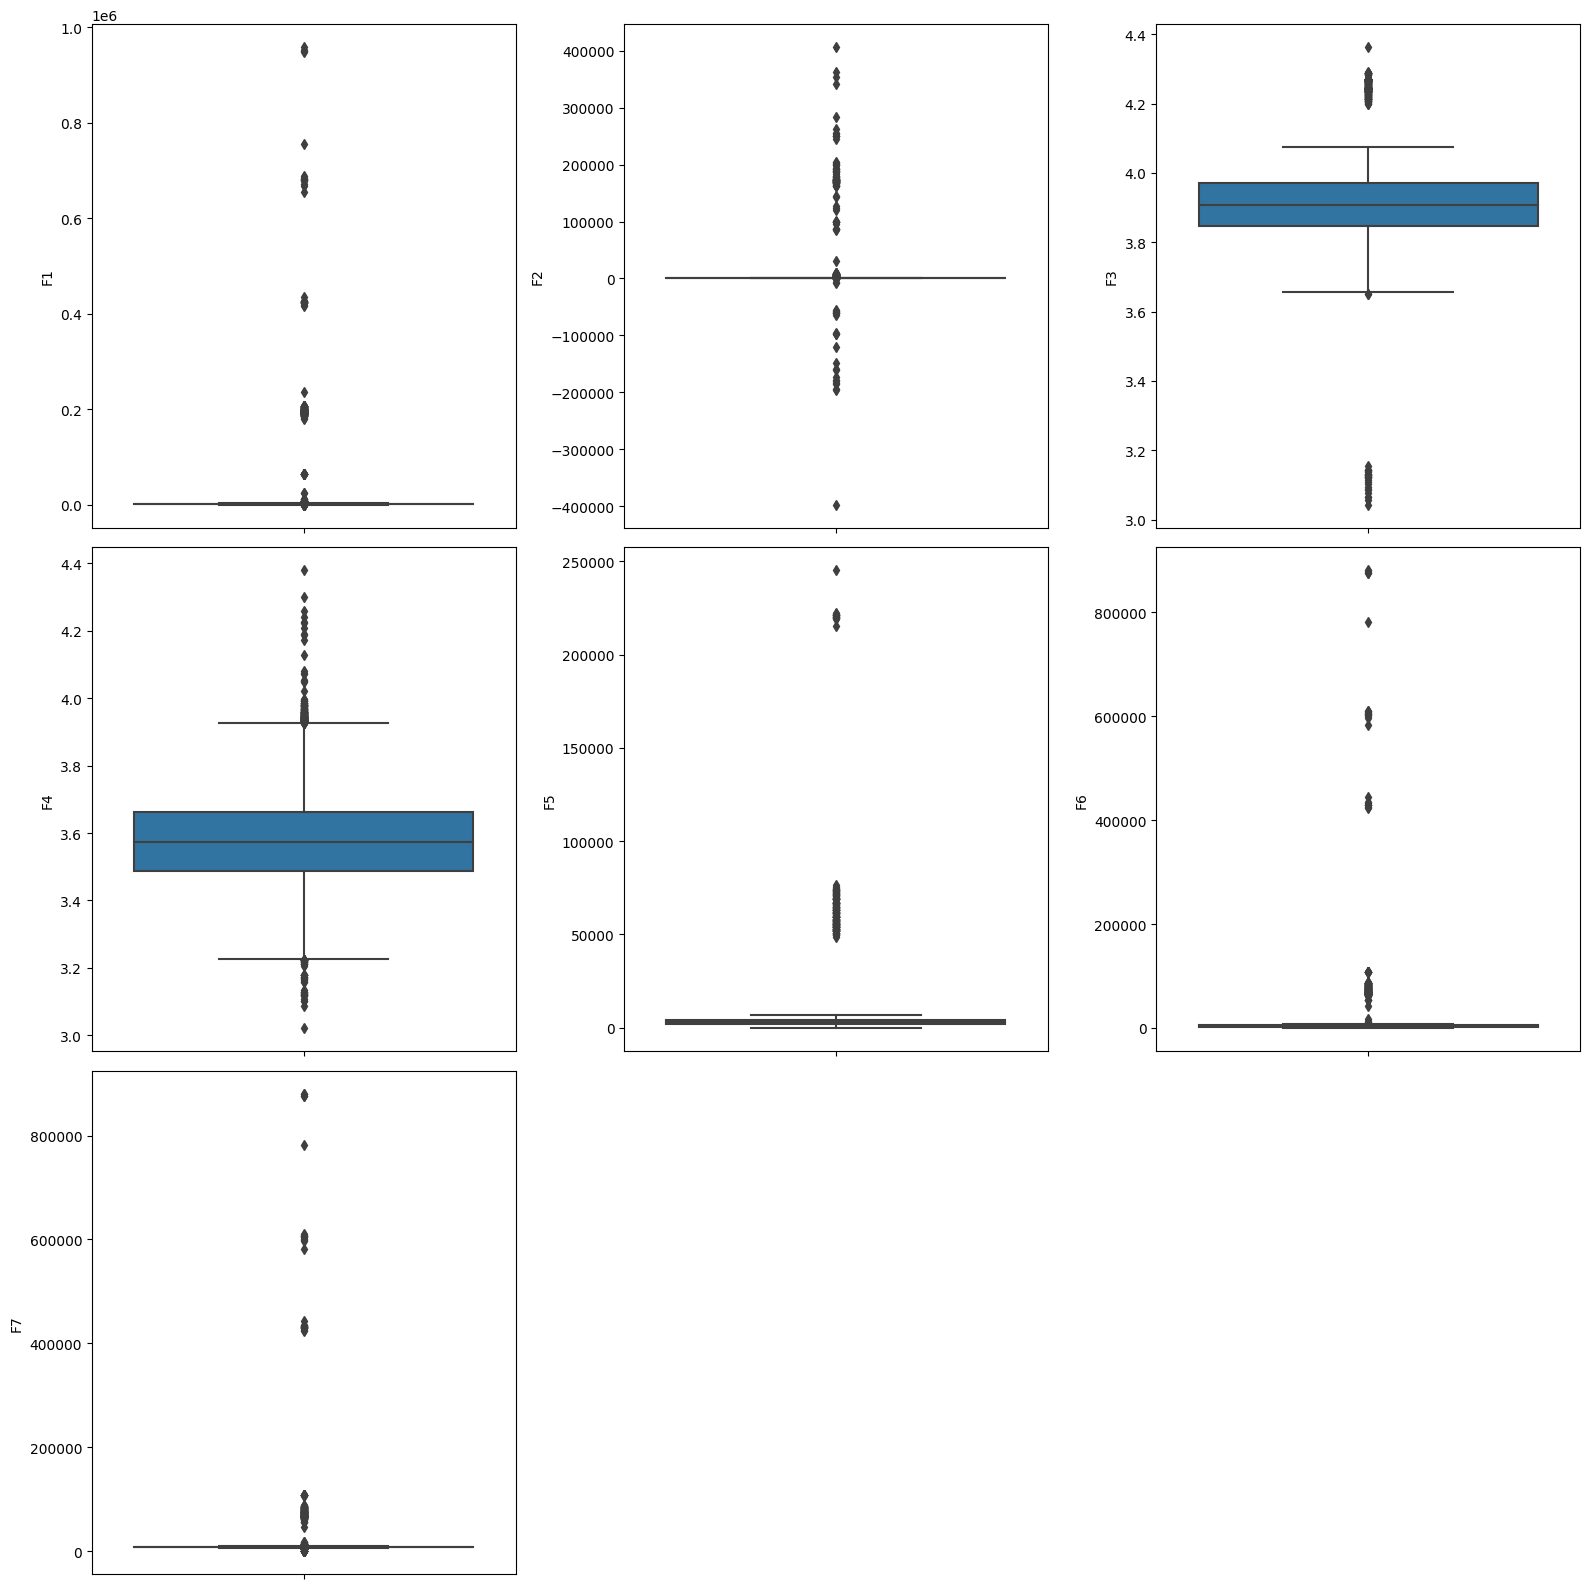

In [27]:
plt.figure(figsize=(16,16))

for i,col in enumerate(new_col_labels):    
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=col, data=df)

plt.tight_layout()

plt.show()

<AxesSubplot: xlabel='F1', ylabel='Count'>

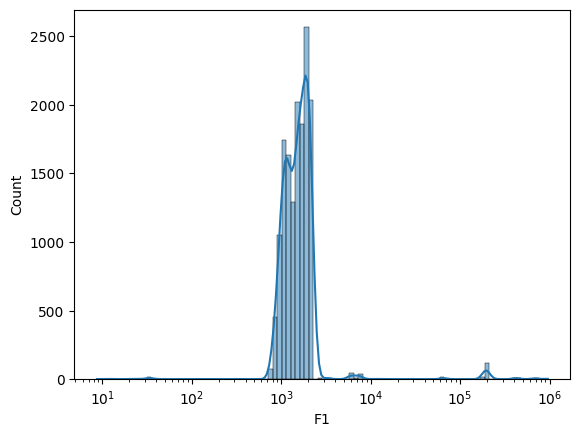

In [53]:
sns.histplot(df.F1, bins=100, kde=True, log_scale=True)

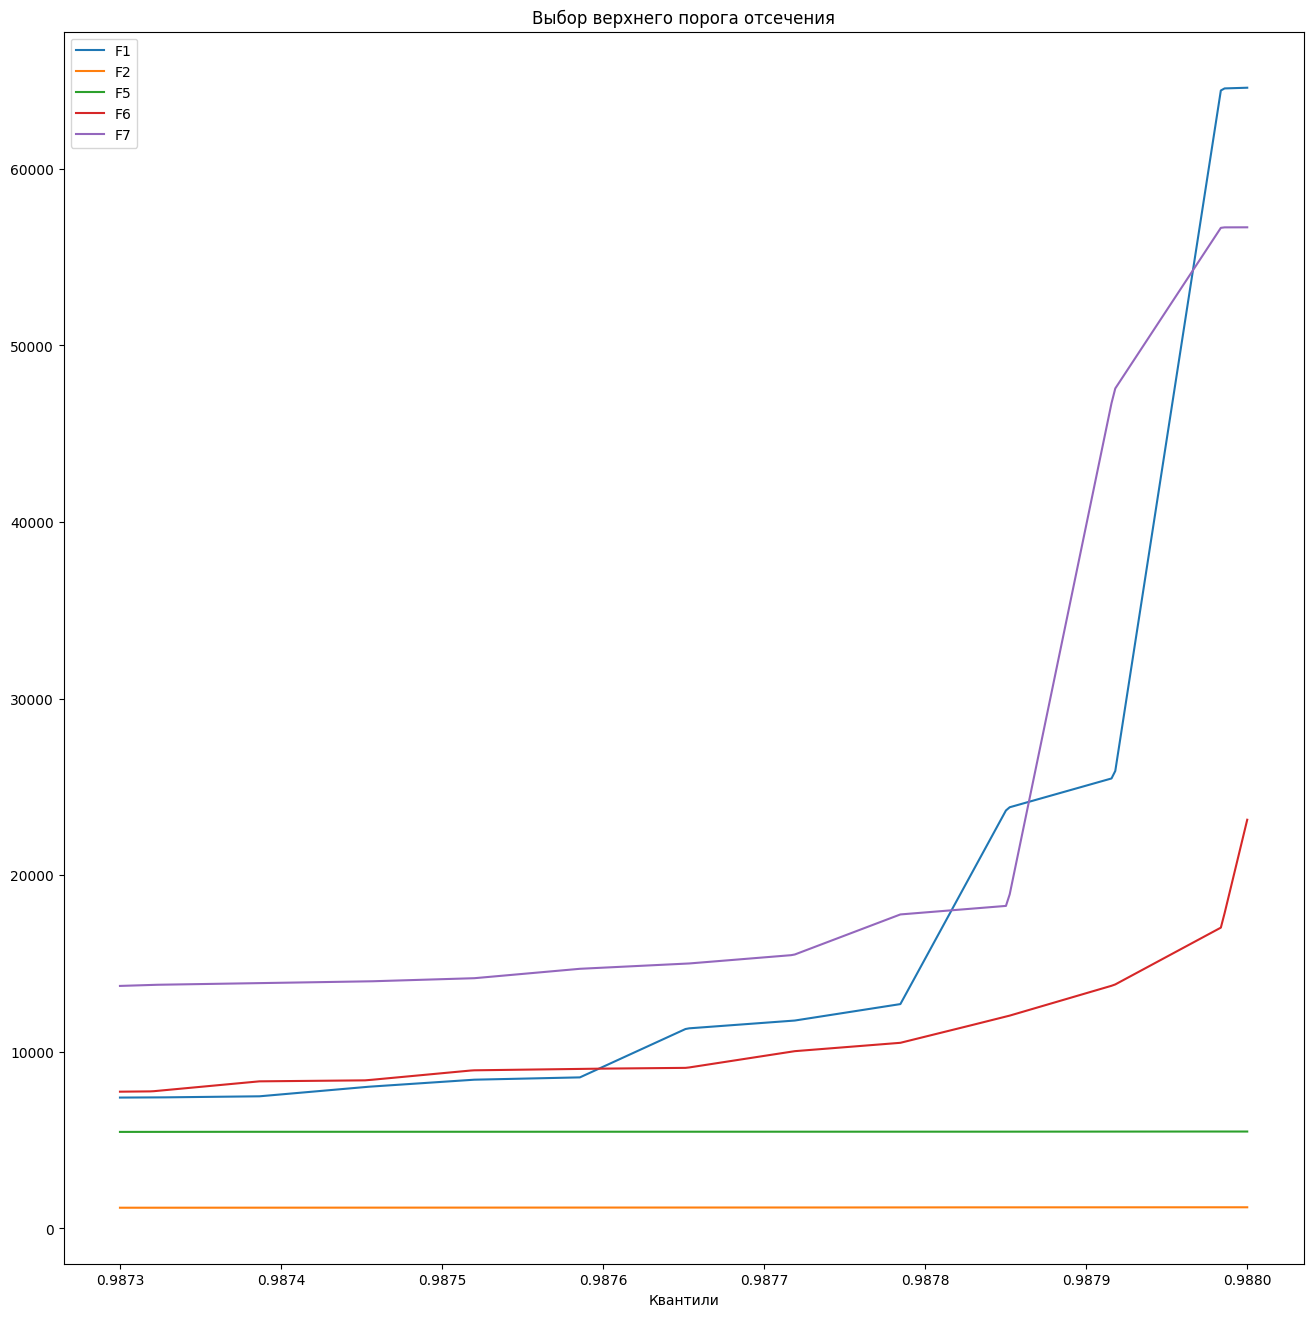

In [184]:
q0 = 0.9873
q1 = 0.9880
pts = 300

plt.figure(figsize=(16,16))
plt.plot(np.linspace(q0, q1, pts), [ df.F1.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F1')
plt.plot(np.linspace(q0, q1, pts), [ df.F2.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F2')
plt.plot(np.linspace(q0, q1, pts), [ df.F5.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F5')
plt.plot(np.linspace(q0, q1, pts), [ df.F6.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F6')
plt.plot(np.linspace(q0, q1, pts), [ df.F7.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F7')
plt.title(label='Выбор верхнего порога отсечения')
plt.xlabel('Квантили')
plt.legend()
plt.show()

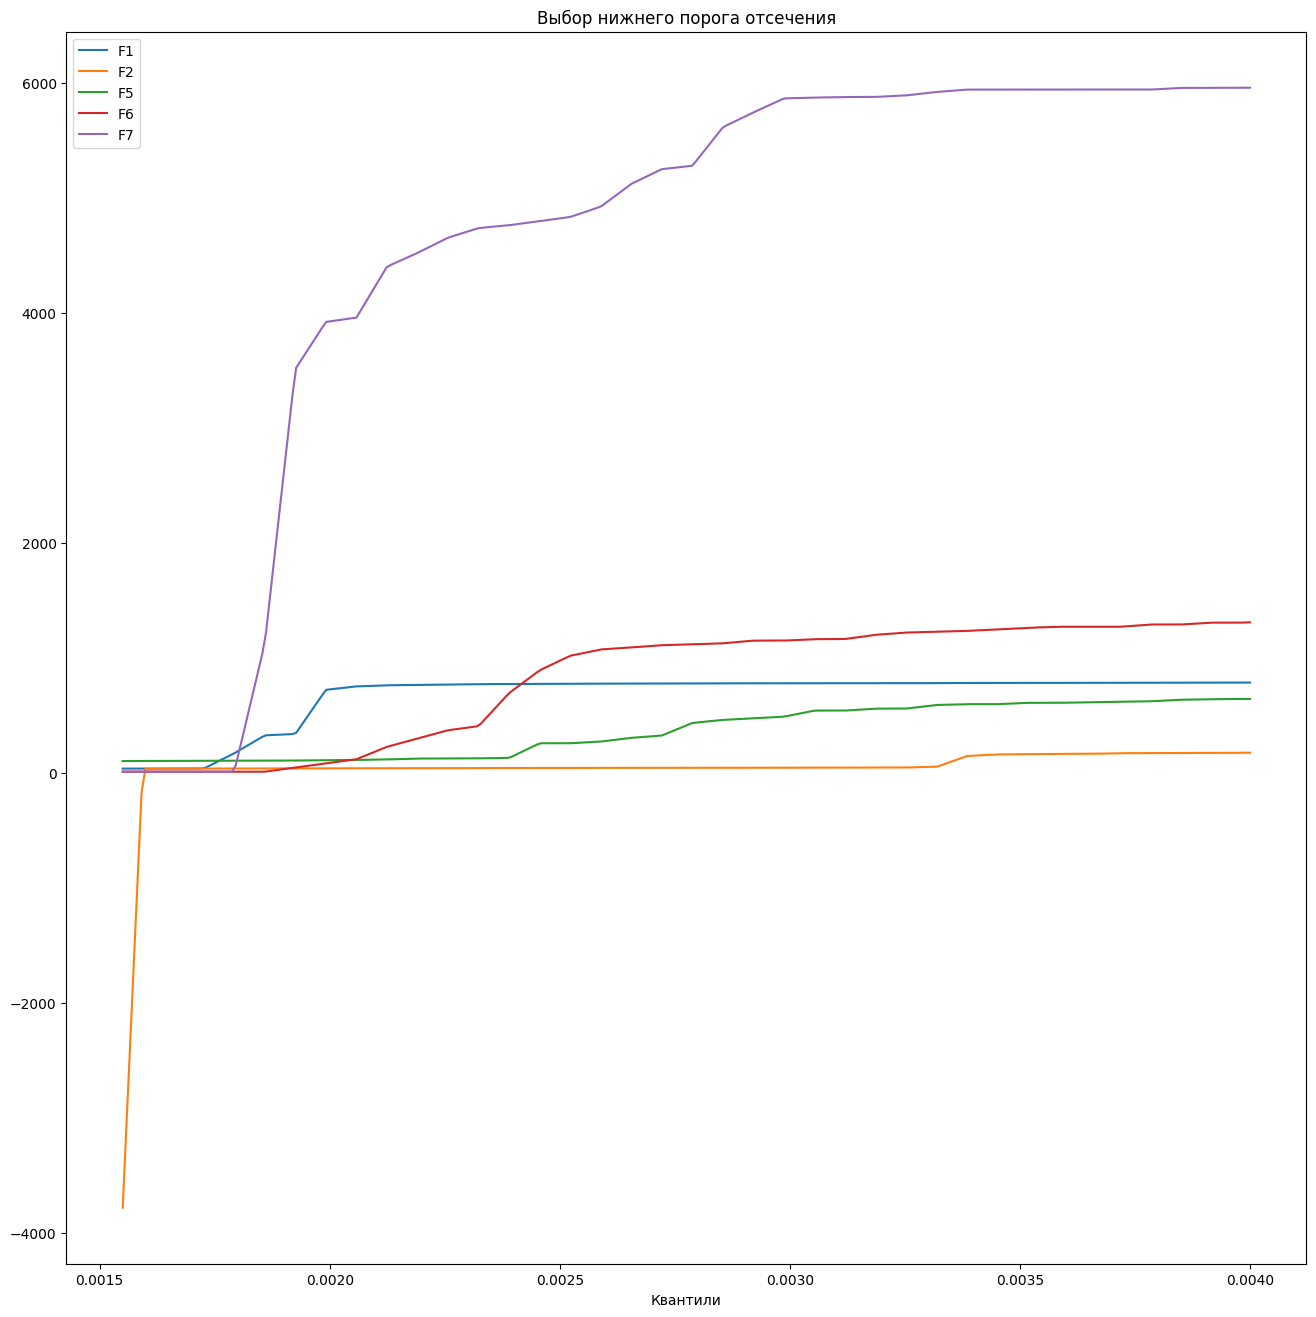

In [185]:
q0 = 0.00155
q1 = 0.0040
pts = 300

plt.figure(figsize=(16,16))
plt.plot(np.linspace(q0, q1, pts), [ df.F1.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F1')
plt.plot(np.linspace(q0, q1, pts), [ df.F2.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F2')
plt.plot(np.linspace(q0, q1, pts), [ df.F5.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F5')
plt.plot(np.linspace(q0, q1, pts), [ df.F6.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F6')
plt.plot(np.linspace(q0, q1, pts), [ df.F7.quantile(q=y) for y in np.linspace(q0, q1, pts) ], label='F7')
plt.title(label='Выбор нижнего порога отсечения')
plt.xlabel('Квантили')
plt.legend()
plt.show()

In [ ]:
# Будем отсекать по F7: оставим значения от 3000 до 15000

In [197]:
df1 = df[3000 < df.F7]
df1 = df1[df.F7 < 15000]


C:\Users\Peter\AppData\Local\Temp\ipykernel_7640\253016463.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.F7 < 15000]


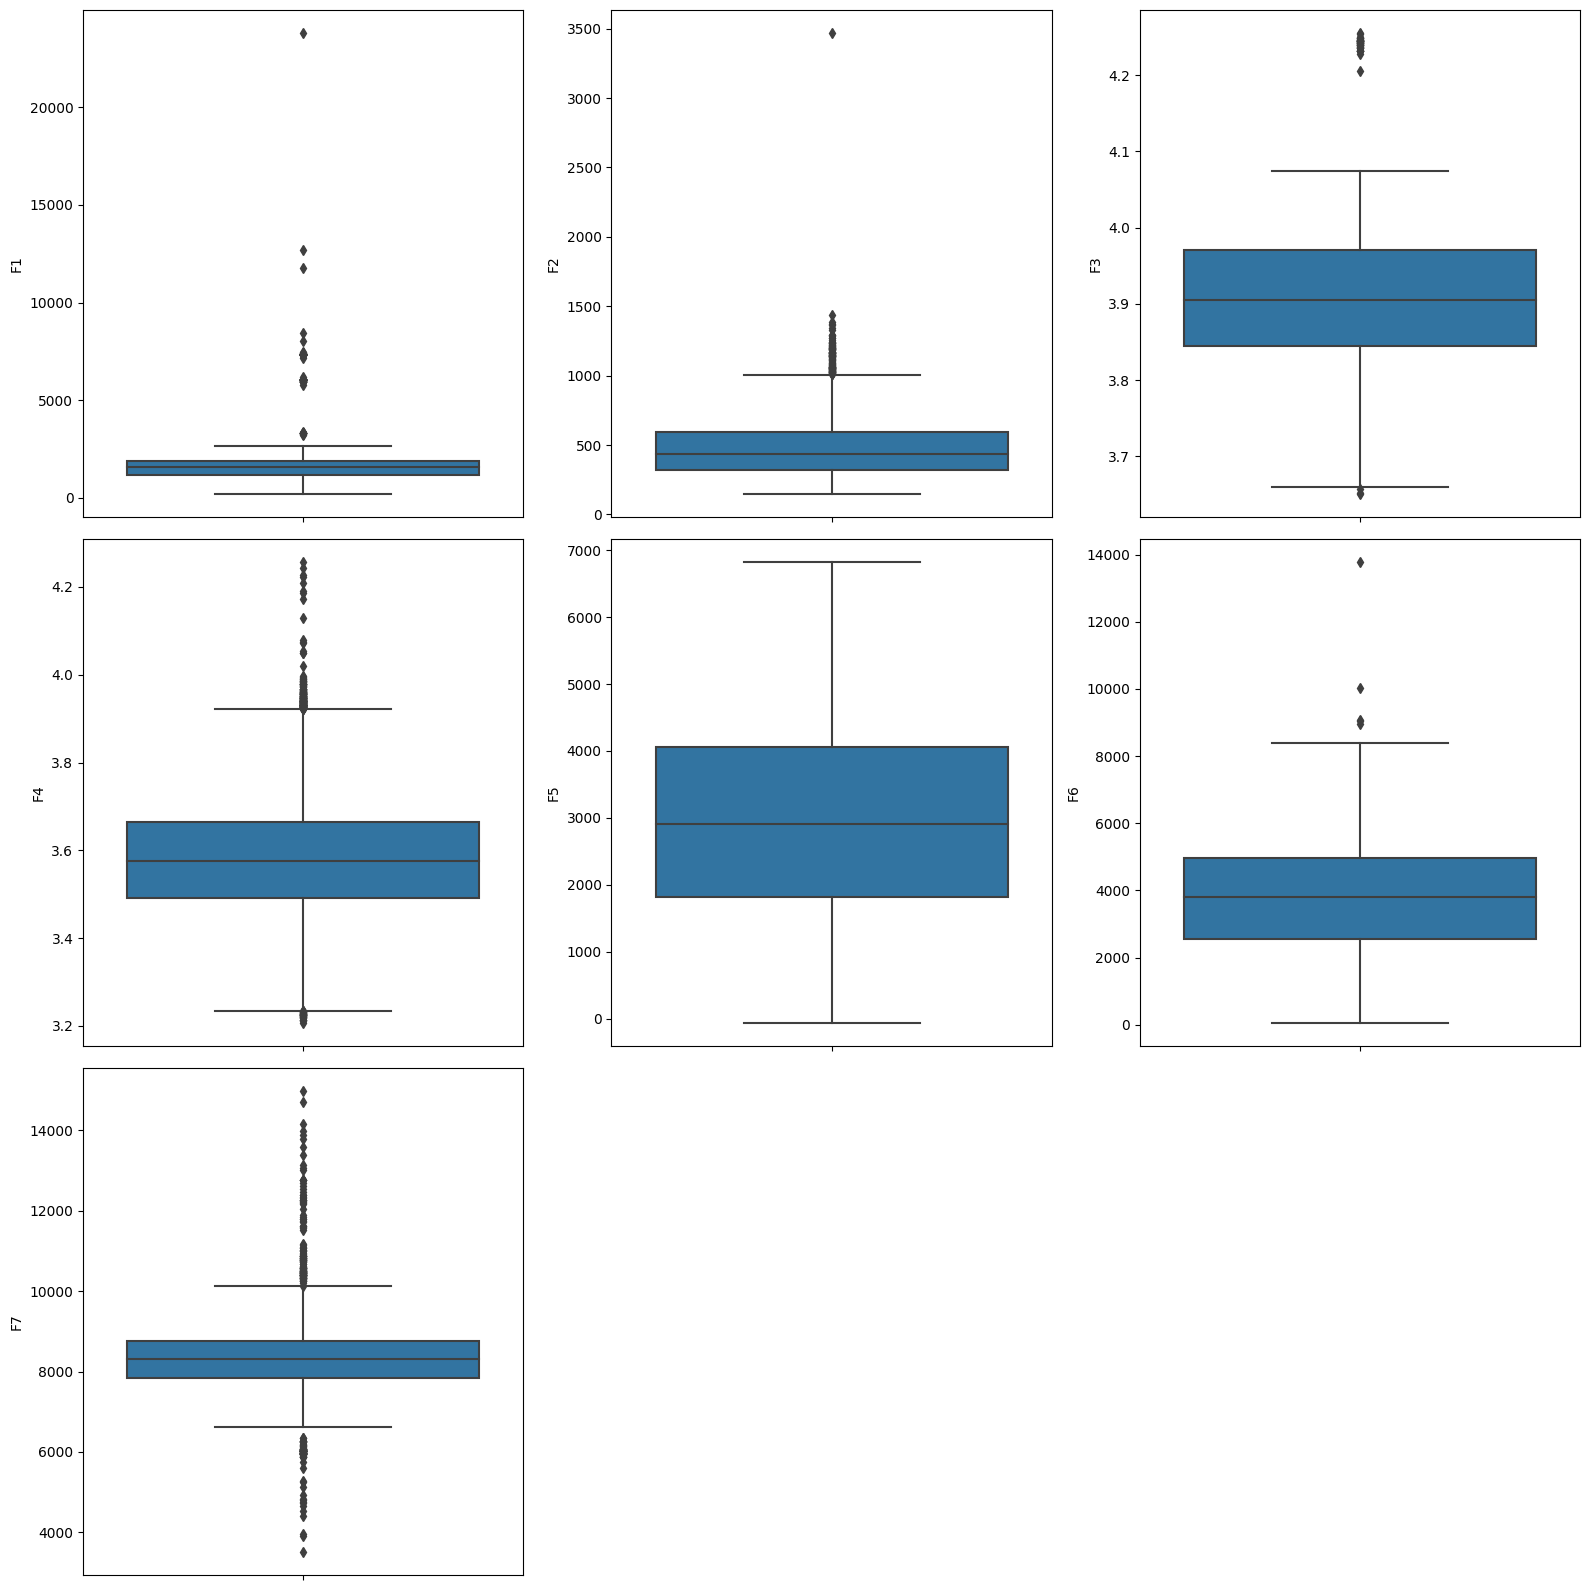

In [198]:
plt.figure(figsize=(16,16))

for i,col in enumerate(new_col_labels):    
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=col, data=df1)

plt.tight_layout()

plt.show()

In [ ]:
# Остаются значительные выбросы у F1 и F2, уберем их

In [199]:
df1 = df1[df.F1 < 10000]
df1 = df1[df.F2 < 3000]

C:\Users\Peter\AppData\Local\Temp\ipykernel_7640\2891780416.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.F1 < 10000]
C:\Users\Peter\AppData\Local\Temp\ipykernel_7640\2891780416.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.F2 < 3000]


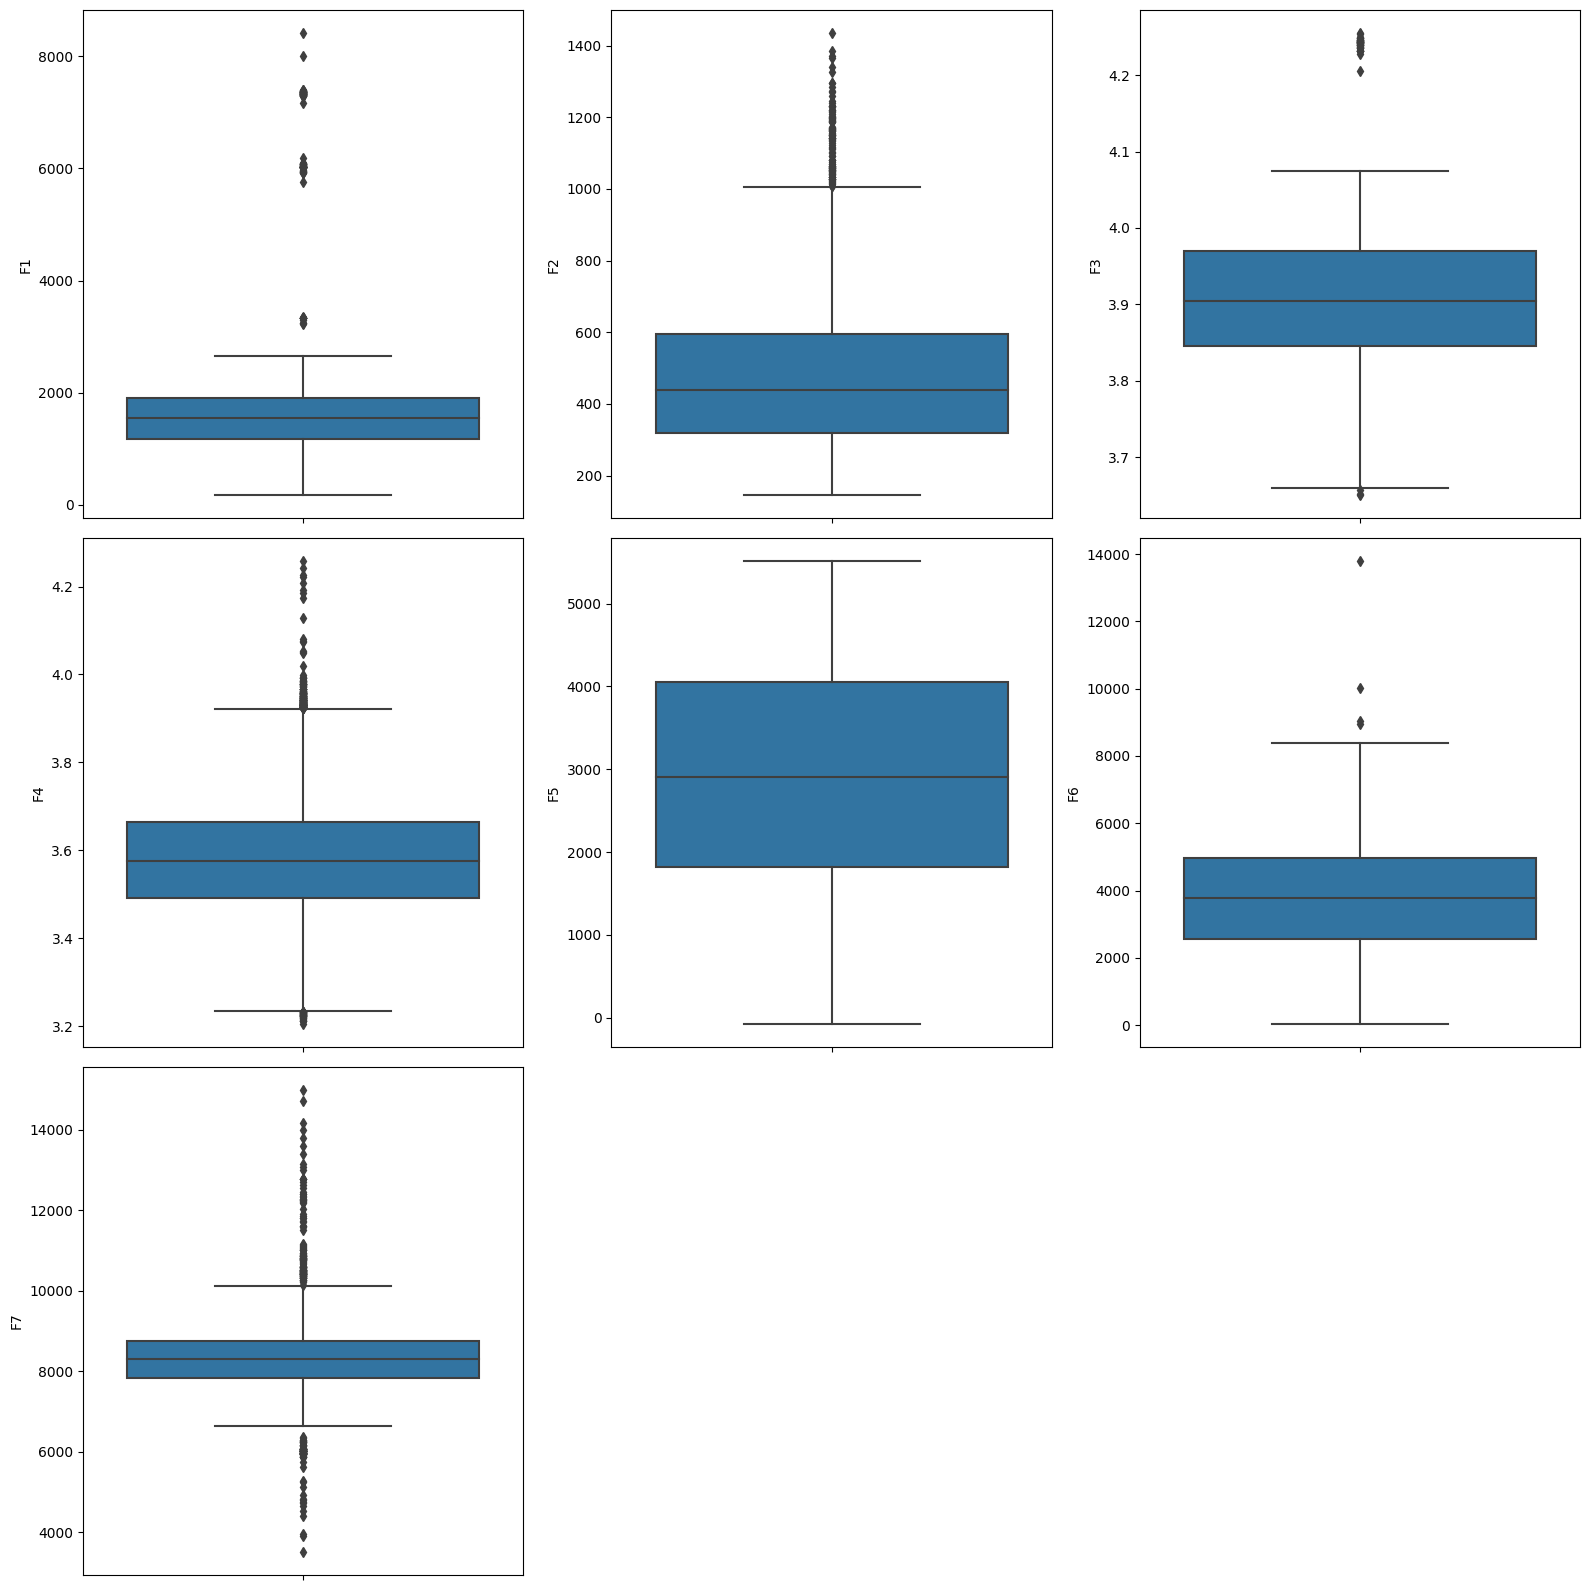

In [200]:
plt.figure(figsize=(16,16))

for i,col in enumerate(new_col_labels):    
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=col, data=df1)

plt.tight_layout()

plt.show()

In [206]:
print(f'Отброшено {100*(1-df1.shape[0]/df.shape[0])}%, {df.shape[0] - df1.shape[0]} значений')

Отброшено 1.45379713223579%, 219 значений


In [207]:
df1.corrwith(df1.RUL)

F1     0.782461
F2     0.950237
F3     0.928035
F4    -0.785257
F5     0.977422
F6     0.970610
F7     0.726686
RUL    1.000000
dtype: float64

In [208]:
df1.corr()

,F1,F2,F3,F4,F5,F6,F7,RUL
F1,1.000000,0.856084,0.801600,-0.647825,0.784404,0.781894,0.520276,0.782461
F2,0.856084,1.000000,0.914439,-0.791079,0.959271,0.948802,0.689987,0.950237
F3,0.801600,0.914439,1.000000,-0.762568,0.922911,0.915351,0.665650,0.928035
F4,-0.647825,-0.791079,-0.762568,1.000000,-0.839681,-0.823222,-0.612055,-0.785257
F5,0.784404,0.959271,0.922911,-0.839681,1.000000,0.990269,0.768073,0.977422
F6,0.781894,0.948802,0.915351,-0.823222,0.990269,1.000000,0.780612,0.970610
F7,0.520276,0.689987,0.665650,-0.612055,0.768073,0.780612,1.000000,0.726686
RUL,0.782461,0.950237,0.928035,-0.785257,0.977422,0.970610,0.726686,1.000000


<AxesSubplot: xlabel='F1', ylabel='Count'>

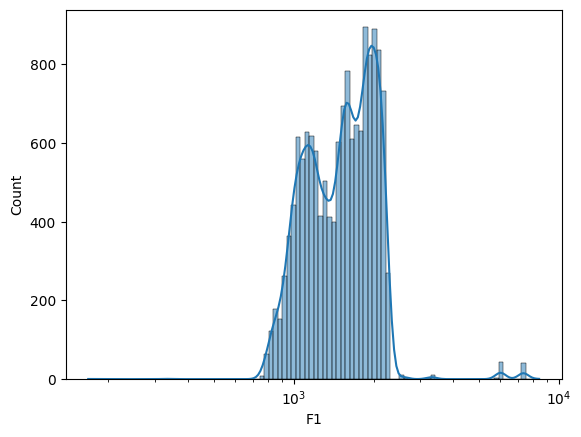

In [162]:
sns.histplot(df1.F1, bins=100, kde=True, log_scale=True)

In [209]:
df.loc[14949]

F1      34.560
F2      40.000
F3       3.128
F4       3.673
F5     102.000
F6       8.000
F7       8.000
RUL    116.000
Name: 14949, dtype: float64

In [210]:
df1.loc[14949]

KeyError: 14949